<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">[Minería de datos: Modelos y algoritmos](http://www.editorialuoc.cat/mineria-de-datos)</p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH3EJ1 Preparación de datos

## 1. Carga de los datos y verificaciones inciales

Cargamos y/o instalamos las librerias necesarios

In [1]:
if(!require(arules)){
    install.packages('arules',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(mlbench)
}
if(!require(Matrix)){
    install.packages('Matrix',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(Matrix)
}
if(!require(ggplot2)){
    install.packages('ggplot2',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(ggplot2)
}

Loading required package: arules
Warning message:
"package 'arules' was built under R version 3.3.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

Cargamos los datos de un directorio local y observamos las primeras variables.

In [2]:
Alumnos_usos_sociales <- read.csv("B2.332_Students.csv", comment.char="#")
head(Alumnos_usos_sociales)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Supera
GP,F,18,U,GT3,A,Superior,Superior,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Si
GP,F,17,U,GT3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,3,1,1,3,2,9,11,11,Si
GP,F,15,U,LE3,T,Primaria_Superior,Primaria_Superior,at_home,other,...,3,2,2,3,3,6,12,13,12,Si
GP,F,15,U,GT3,T,Superior,Grado_9,health,services,...,2,2,1,1,5,0,14,14,14,Si
GP,F,16,U,GT3,T,Secundaria,Secundaria,other,other,...,3,2,1,2,5,0,11,13,13,Si
GP,M,16,U,LE3,T,Superior,Secundaria,services,other,...,4,2,1,2,5,6,12,12,13,Si


Revisamos si tenemos valores duplicados. 

En este caso el *count* de registros y registros con valores únicos es igual. Por lo tanto, podemos concluir que no hay registros duplicados.

In [3]:
nrow(Alumnos_usos_sociales)
X <- unique(Alumnos_usos_sociales)
nrow(X)

[1] 1044

[1] 1044

Revisamos si tenemos registros con campos con valores nulos. 

En este caso todos los registros tienen los campos informados.

In [4]:
sapply(Alumnos_usos_sociales,function(x)(sum(is.na(x))))

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3     Supera 
         0          0          0          0          0          0

### 2. Resumen de los datos: Análisis univariante

In [5]:
summary(Alumnos_usos_sociales)

 school   sex          age        address famsize   Pstatus
 GP:772   F:591   Min.   :15.00   R:285   GT3:738   A:121  
 MS:272   M:453   1st Qu.:16.00   U:759   LE3:306   T:923  
                  Median :17.00                            
                  Mean   :16.73                            
                  3rd Qu.:18.00                            
                  Max.   :22.00                            
                Medu                    Fedu           Mjob           Fjob    
 Grado_9          :289   Grado_9          :324   at_home :194   at_home : 62  
 Ninguna          :  9   Ninguna          :  9   health  : 82   health  : 41  
 Primaria_Superior:202   Primaria_Superior:256   other   :399   other   :584  
 Secundaria       :238   Secundaria       :231   services:239   services:292  
 Superior         :306   Superior         :224   teacher :130   teacher : 65  
                                                                              
        reason      guardia

Creamos histogramas sobre diversas variables a investigar. 

Observamos las carácteristicas del primer histograma.

[1] 15.0 15.5 16.0 16.5 17.0 17.5 18.0 18.5 19.0 19.5 20.0 20.5 21.0 21.5 22.0

[1] 194 281   0 277   0 222   0  56   0   9   0   3   0   2

[1] 0.371647510 0.538314176 0.000000000 0.530651341 0.000000000 0.425287356
 [7] 0.000000000 0.107279693 0.000000000 0.017241379 0.000000000 0.005747126
[13] 0.000000000 0.003831418

[1] 15.25 15.75 16.25 16.75 17.25 17.75 18.25 18.75 19.25 19.75 20.25 20.75
[13] 21.25 21.75

[1] "Alumnos_usos_sociales$age"

[1] TRUE

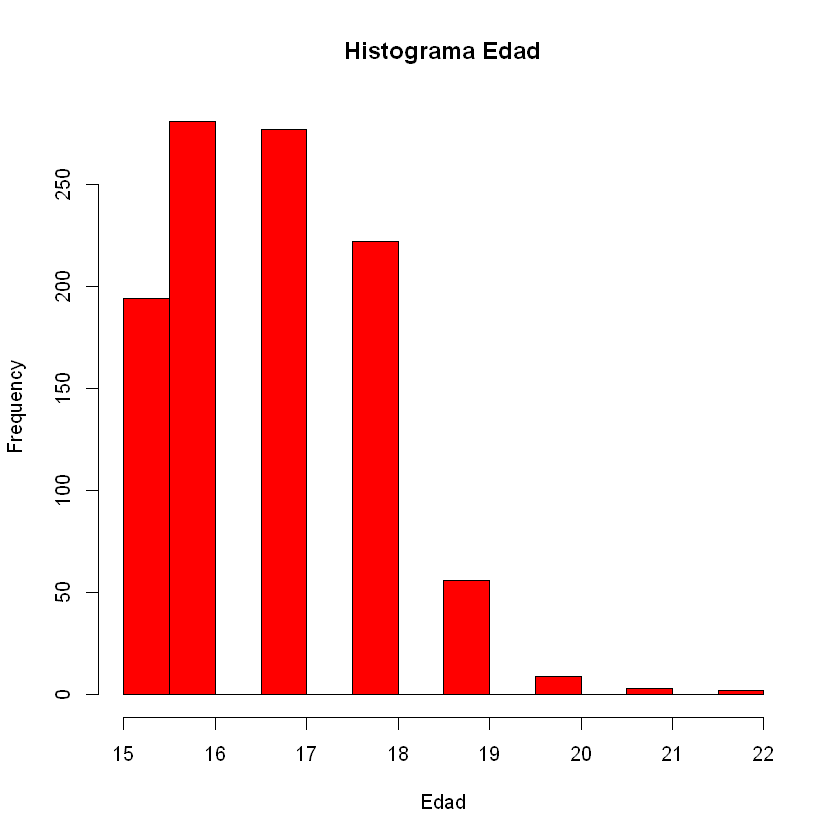

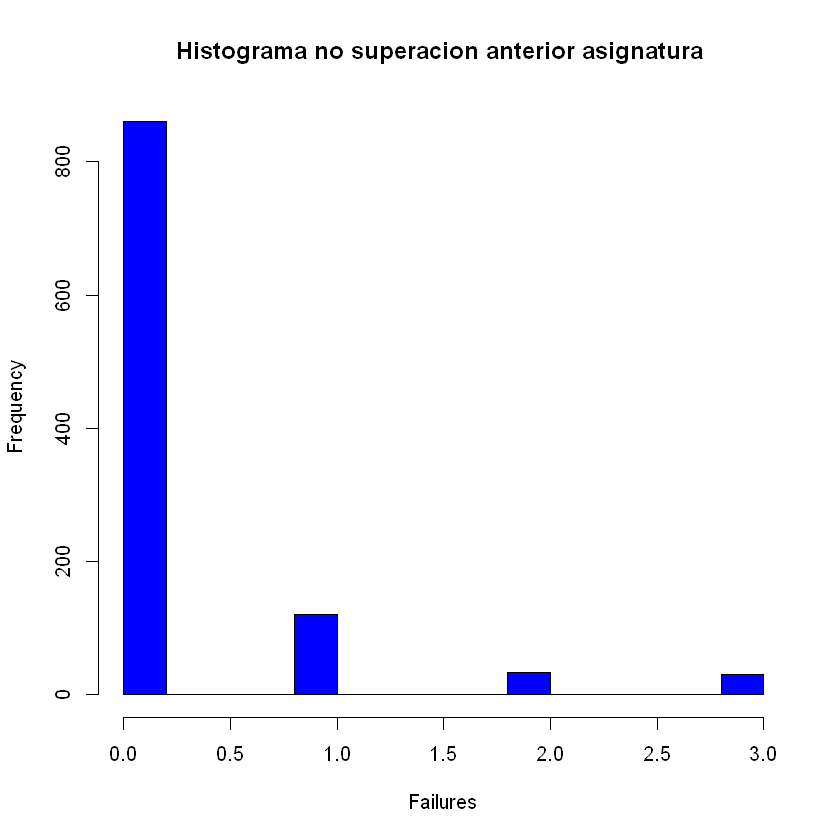

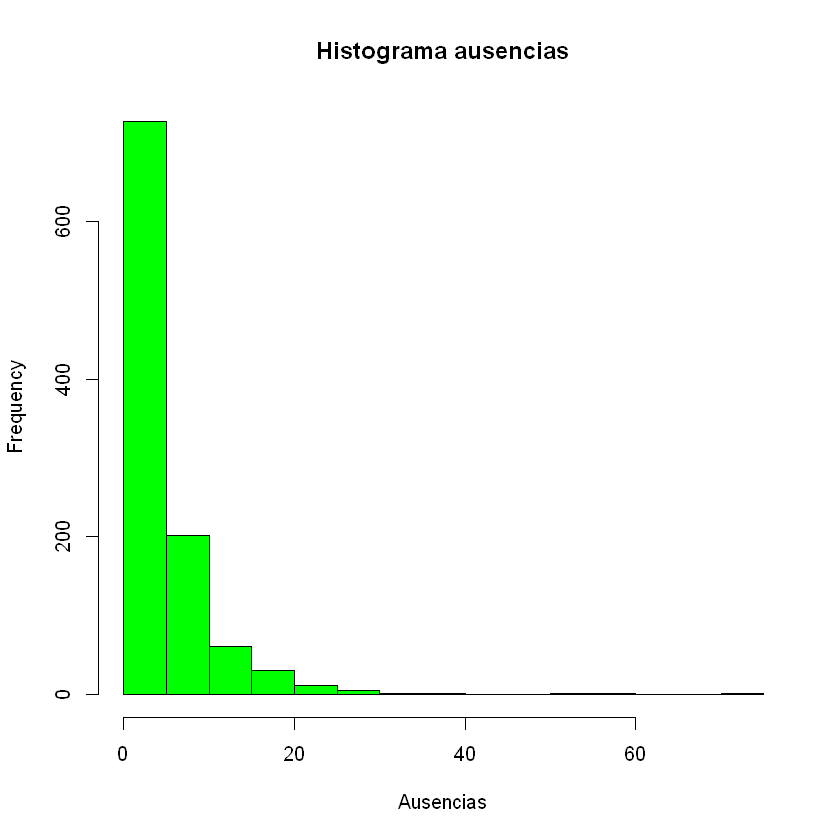

In [6]:
# Histograma Edad. En este caso observamos los valores derivados.
H1 <- hist(Alumnos_usos_sociales$age, main="Histograma Edad", xlab ="Edad", col = "red") 
H1$breaks
H1$counts
H1$density
H1$mids
H1$xname
H1$equidist
# Histograma failure
H2 <- hist(Alumnos_usos_sociales$failures, main="Histograma no superacion anterior asignatura ", xlab ="Failures", col = "blue")
# Histograma absences
H3 <- hist(Alumnos_usos_sociales$absences, main="Histograma ausencias", xlab ="Ausencias", col = "green")

Creamos un gráfico de dispersión por el campo `ausencias`

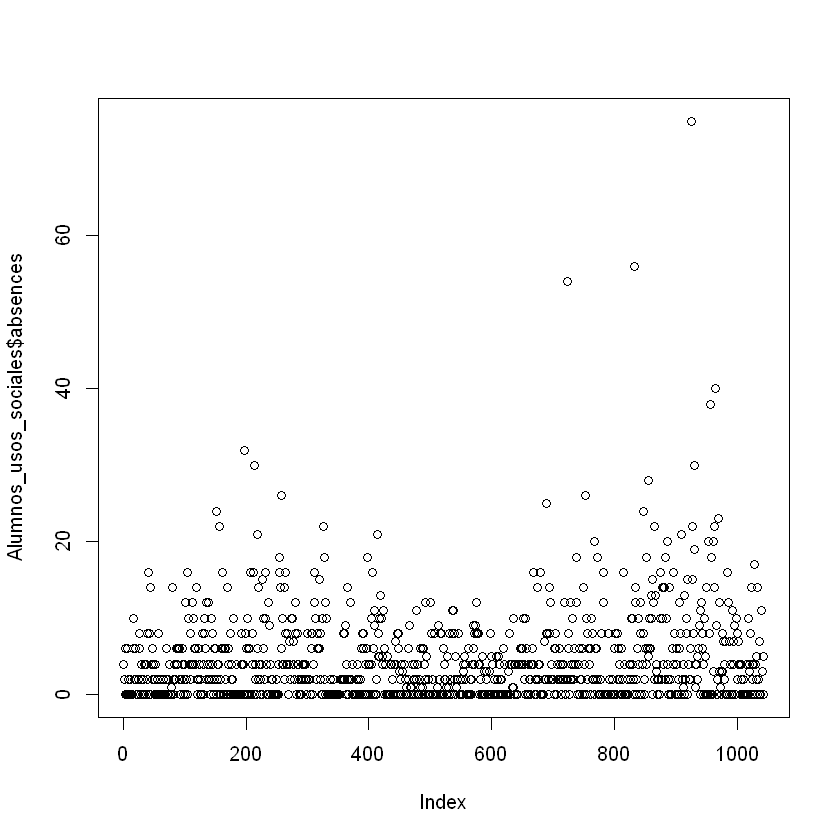

In [7]:
gtotal<-plot(Alumnos_usos_sociales$absences)

### Análisis multivariable

Diversos ejemplos de análisis bivariable. 

El último ejemplo utiliza el color y el tamaño para introducir informació de unas nuevas variables. 

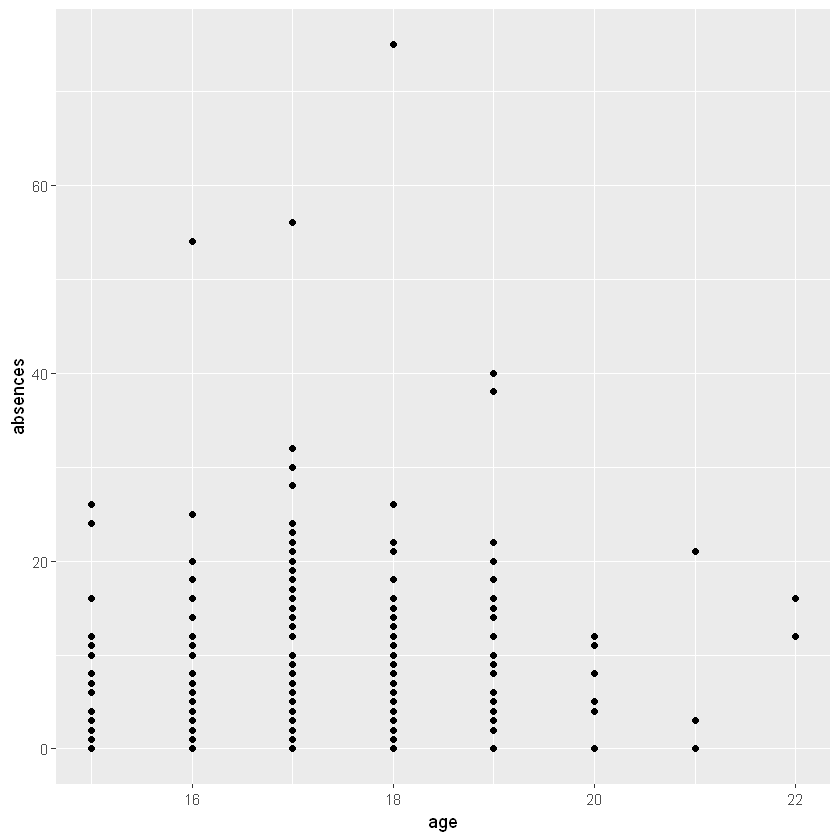

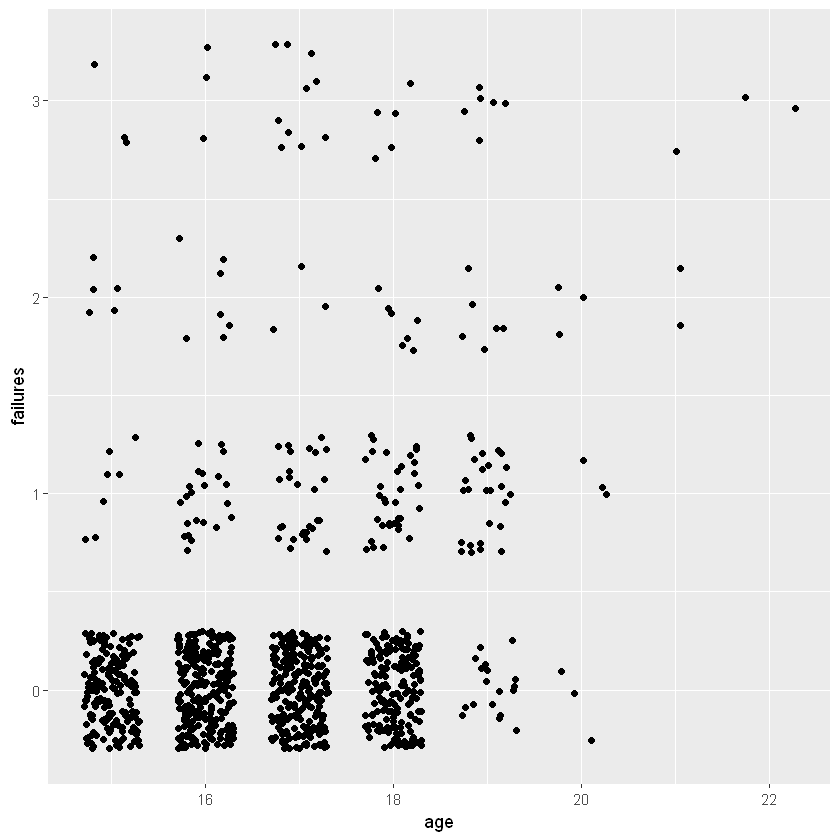

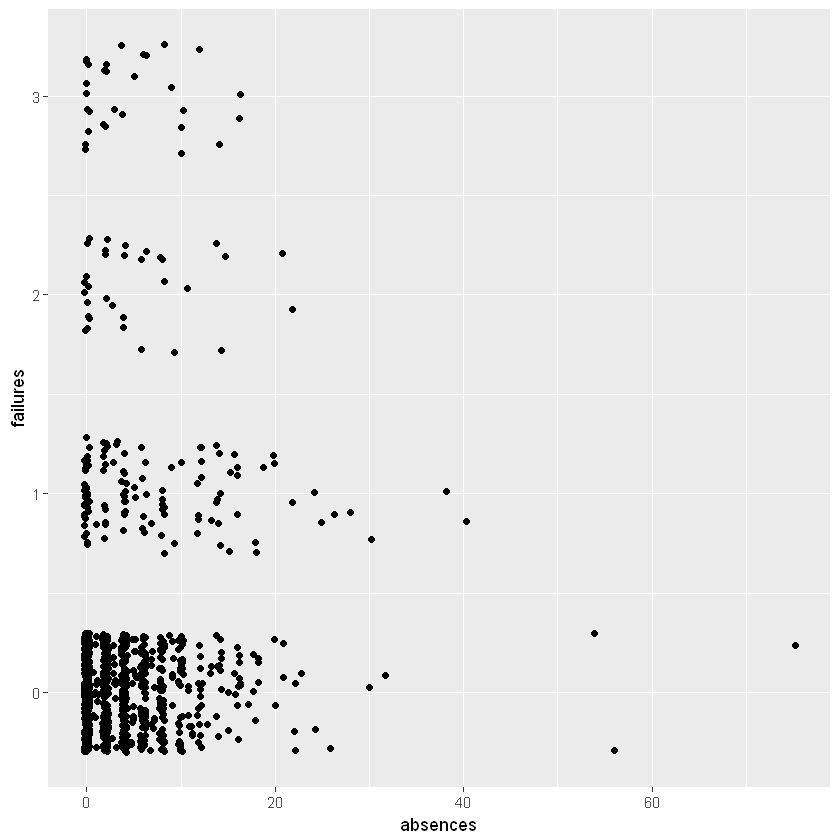

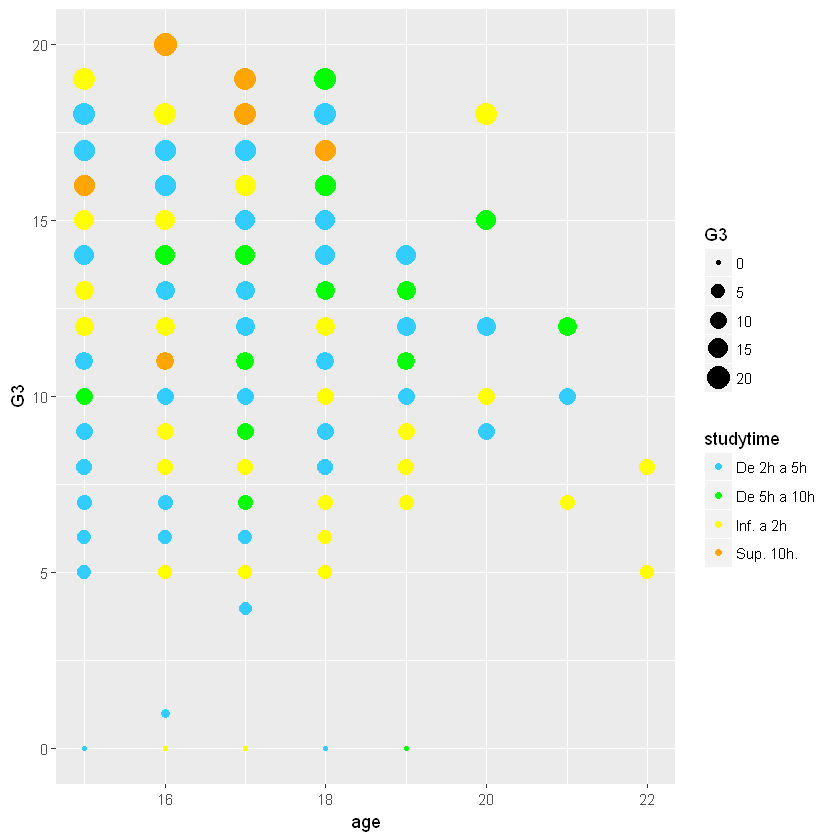

In [8]:
if(!require(ggplot2)){
    install.packages('ggplot2',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(ggplot2)
}
# Analisis bivariable edad+ausencias
g1<-ggplot(Alumnos_usos_sociales, aes(x=age, y=absences)) + geom_point()
g1

# Analisis bivariable edad+asignatura no superada 
g2<-ggplot(Alumnos_usos_sociales, aes(x=age, y=failures)) + geom_point(position = position_jitter(w = 0.3, h = 0.3))
g2

# Analisis bivariable ausencia+asignatura no superada
g3<-ggplot(Alumnos_usos_sociales, aes(x=absences, y=failures)) + geom_point(position = position_jitter(w = 0.3, h = 0.3))
g3

# Relacion edad+nota final+horas de estudio
hh<-ggplot(Alumnos_usos_sociales, aes(x=age, y=G3, color=studytime)) + geom_point(aes(size=G3)) + scale_color_manual(values=c("#33CCFF","green","yellow","orange","red","#660066"))
hh

Estudio de la relación de una de las variables respecto la media de otras.

In [9]:
# Estudiamos la existencia de diferencias por Fracaso y la media de cada una del resto de variables numericas
tapply(Alumnos_usos_sociales$age,Alumnos_usos_sociales$Supera,mean)
tapply(Alumnos_usos_sociales$absences,Alumnos_usos_sociales$Supera,mean)
tapply(Alumnos_usos_sociales$failures,Alumnos_usos_sociales$Supera,mean)

No       Si 
17.03913 16.63759

No       Si 
5.826087 4.041769

No        Si 
0.7173913 0.1363636

Creamos diversas tablas de contingencia, valores absolutos y proporciones.

In [10]:
# Tabla de contingencia sexo respecto soportes escolar y familiar
table(Alumnos_usos_sociales$sex,Alumnos_usos_sociales$schoolsup)
table(Alumnos_usos_sociales$sex,Alumnos_usos_sociales$famsup)
# Tabla de contingencia sexo respecto supera
X <- table(Alumnos_usos_sociales$sex,Alumnos_usos_sociales$Supera)
X
# Calculamos la proporcion
prop.table(X,1)

   
     no yes
  F 504  87
  M 421  32

   
     no yes
  F 194 397
  M 210 243

   
     No  Si
  F 125 466
  M 105 348

   
           No        Si
  F 0.2115059 0.7884941
  M 0.2317881 0.7682119

### 4. Buscamos correlaciones entre variables

,age,absences,failures
age,1.0000000,0.15319565,0.28236357
absences,0.1531956,1.00000000,0.09999785
failures,0.2823636,0.09999785,1.00000000


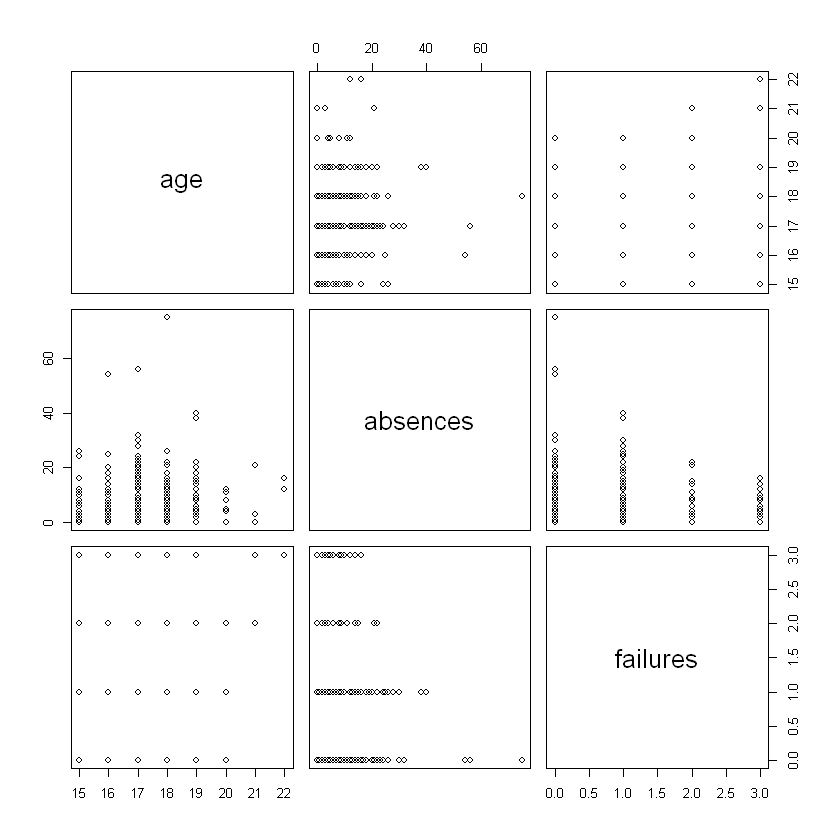

In [11]:
X <- Alumnos_usos_sociales[,c("age","absences","failures")]  
cor(X)
plot(X)

Creamos campos nuevos convirtiendo valores numéricos existentes a texto para mejorar la lectura de un modelo futuro a construir.

In [19]:
# famrel y health tendran equivalentes dZ.famrel y dZ.health con valores categóricos.
Z <- Alumnos_usos_sociales[,c(24,29)]
dZ <- Z
for(h in 1:2){
  Alumnos_usos_sociales <- within(Alumnos_usos_sociales,{dZ[,h]<-discretize(Z[,h],method="frequency",categories=5,labels=c("very_bad","bad","normal","good","very_good"))})
}
# freetime, goout, Dalc y Walc tendran equivalentes dX.freetime dX.goout dX.Dalc y dX.Walc con valores categóricos. 
X <- Alumnos_usos_sociales[,c(25,26,27,28)]
dX <- X
for(i in 1:4){
  Alumnos_usos_sociales <- within(Alumnos_usos_sociales,{dX[,i]<-discretize(X[,i],method="frequency",categories=5,labels=c("very_low","low","medium","high","very_high"))})
}
# Revisamos las nuevas variables
head(Alumnos_usos_sociales)


Warning message in min(xx[xx > upper]):
"no non-missing arguments to min; returning Inf"Warning message in min(xx[xx > upper]):
"no non-missing arguments to min; returning Inf"